# English Subtitles Level Prediction

# Выбор модели

---

**Входные данные**

Таблица, содержащая:  
- названия фильмов;
- рейтинг, выставленный экспертом;
- текстовое поле, содержащее слова из субтитров.

---

**Цель**

Создать модель, предсказывающую уровень сложности английского языка по CEFR.

---

**Задачи:**  

- выбрать метрику для оптимизации гиперпараметров модели;
- построить пайплайн с использованием TfidfVectorizer();  
- учесть в пайплайне возможность обработки дополнительных числовых признаков;
- построить несколько различных моделей;
- разработать комплексную метрику для оценки модели;
- выбрать лучшую модель;
- оценить качество моделей по дополнительным метрикам;
- сделать контрольную проверку на тестовой выборке;
- сохранить модель для использования в приложении.

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Initial" data-toc-modified-id="Initial-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initial</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Constants" data-toc-modified-id="Constants-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Constants</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Settings" data-toc-modified-id="Settings-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Settings</a></span></li></ul></li><li><span><a href="#Read-and-Check-data" data-toc-modified-id="Read-and-Check-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read and Check data</a></span><ul class="toc-item"><li><span><a href="#Read-data" data-toc-modified-id="Read-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Read data</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#Выбор-метрики-для-оптимизации" data-toc-modified-id="Выбор-метрики-для-оптимизации-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Выбор метрики для оптимизации</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Выделение-признаков-и-целевой-переменной" data-toc-modified-id="Выделение-признаков-и-целевой-переменной-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Выделение признаков и целевой переменной</a></span></li><li><span><a href="#Разделение-на-обучающую-и-валидационную-выборки" data-toc-modified-id="Разделение-на-обучающую-и-валидационную-выборки-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Разделение на обучающую и валидационную выборки</a></span></li></ul></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Селекторы-числовых-и-категориальных-признаков" data-toc-modified-id="Селекторы-числовых-и-категориальных-признаков-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Селекторы числовых и категориальных признаков</a></span></li><li><span><a href="#Предбработка-числовых-признаков" data-toc-modified-id="Предбработка-числовых-признаков-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Предбработка числовых признаков</a></span></li><li><span><a href="#Предбработка-категориальных-признаков" data-toc-modified-id="Предбработка-категориальных-признаков-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Предбработка категориальных признаков</a></span></li><li><span><a href="#Объединение-предобработки-числовых-и-категориальных-признаков" data-toc-modified-id="Объединение-предобработки-числовых-и-категориальных-признаков-3.3.4"><span class="toc-item-num">3.3.4&nbsp;&nbsp;</span>Объединение предобработки числовых и категориальных признаков</a></span></li><li><span><a href="#Pipelines'-table" data-toc-modified-id="Pipelines'-table-3.3.5"><span class="toc-item-num">3.3.5&nbsp;&nbsp;</span>Pipelines' table</a></span></li></ul></li><li><span><a href="#Подбор-гиперпараметров" data-toc-modified-id="Подбор-гиперпараметров-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Подбор гиперпараметров</a></span><ul class="toc-item"><li><span><a href="#Objective-functions-для-Optuna" data-toc-modified-id="Objective-functions-для-Optuna-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Objective functions для Optuna</a></span></li><li><span><a href="#Optuna-call" data-toc-modified-id="Optuna-call-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Optuna call</a></span></li><li><span><a href="#Визуализация-результатов-подбора-гиперпараметров" data-toc-modified-id="Визуализация-результатов-подбора-гиперпараметров-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Визуализация результатов подбора гиперпараметров</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ моделей</a></span><ul class="toc-item"><li><span><a href="#Расчет-параметров-для-оценки-модели" data-toc-modified-id="Расчет-параметров-для-оценки-модели-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Расчет параметров для оценки модели</a></span><ul class="toc-item"><li><span><a href="#Время-обучения-модели" data-toc-modified-id="Время-обучения-модели-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Время обучения модели</a></span></li><li><span><a href="#Время-предсказания-модели" data-toc-modified-id="Время-предсказания-модели-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Время предсказания модели</a></span></li><li><span><a href="#Kачество-предсказания-модели" data-toc-modified-id="Kачество-предсказания-модели-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Kачество предсказания модели</a></span></li><li><span><a href="#Комплексная-метрика-модели" data-toc-modified-id="Комплексная-метрика-модели-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Комплексная метрика модели</a></span></li><li><span><a href="#Additional-metrics" data-toc-modified-id="Additional-metrics-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>Additional metrics</a></span></li></ul></li><li><span><a href="#ConfusionMatrixDisplay" data-toc-modified-id="ConfusionMatrixDisplay-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>ConfusionMatrixDisplay</a></span></li><li><span><a href="#Выбор-лучшей-модели" data-toc-modified-id="Выбор-лучшей-модели-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Выбор лучшей модели</a></span></li><li><span><a href="#Save-best-model-dump" data-toc-modified-id="Save-best-model-dump-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Save best model dump</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span><ul class="toc-item"><li><span><a href="#Краткий-обзор-проделанной-работы" data-toc-modified-id="Краткий-обзор-проделанной-работы-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Краткий обзор проделанной работы</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Baseline" data-toc-modified-id="Baseline-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Baseline</a></span></li><li><span><a href="#Моделирование" data-toc-modified-id="Моделирование-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Моделирование</a></span></li><li><span><a href="#Факторы,-влияющие-на-качество-модели" data-toc-modified-id="Факторы,-влияющие-на-качество-модели-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Факторы, влияющие на качество модели</a></span></li><li><span><a href="#Онлайн-приложение" data-toc-modified-id="Онлайн-приложение-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Онлайн-приложение</a></span></li><li><span><a href="#Перспективы" data-toc-modified-id="Перспективы-5.7"><span class="toc-item-num">5.7&nbsp;&nbsp;</span>Перспективы</a></span></li><li><span><a href="#Итого" data-toc-modified-id="Итого-5.8"><span class="toc-item-num">5.8&nbsp;&nbsp;</span>Итого</a></span></li></ul></li></ul></div>

---

## Intro

**Some explanations**

Permanent data tables named like: **data**.  
Temporary data tables named like: **df**.  

The code of the cells are as independent as possible from each other in order to freely manipulate the cells.

Intermediate conclusions are highlighted as follows:

> Intermediate conclusion.

---

## Initial

### Imports

In [932]:
import pandas as pd
import numpy as np

import os
import json
import warnings
import joblib
from datetime import date, time, datetime
from time import time

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import plotly.graph_objects as go
import plotly.io as pio

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, SplineTransformer, FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion

from nltk.corpus import stopwords

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import f1_score, ConfusionMatrixDisplay

import optuna
from optuna.distributions import FloatDistribution, IntDistribution, CategoricalDistribution

### Constants

In [933]:
PATH_LOCAL = 'datasets/'                               # local path to data
PATH_REMOTE = '/datasets/'                             # remote path to data

CR = '\n'                                              # new line

TARGET = 'Level'                                       # target name
SCORING = 'f1_weighted'                                # target metric
VALID_FRAC = 0.2                                       # delayed sampling fraction
N_CV = 10                                              # number of folds during cross-validation

N_TRIALS = 50                                          # max of tries when Optuna optimization run
TIMEOUT = 600                                          # max time when Optuna optimization run
RANDOM_STATE = RANDOM_SEED = RS = 888                  # random_state

In [934]:
ESTIMATOR_LIST = [                                     # estimators list (comment/uncomment estimator to skip/use)
                  'DummyClassifier',
                  'RidgeClassifier',
                  'SGDClassifier',
                  'LinearSVC',
                 ]

### Functions

In [935]:
def custom_read_csv(file_name, separator=','):
    """
    reading dataset of .csv format:
       first from local storage;
       if unsuccessful from remote storage.
    """

    path_local = f'{PATH_LOCAL}{file_name}'
    path_remote = f'{PATH_REMOTE}{file_name}'
    
    if os.path.exists(path_local):
        return pd.read_csv(path_local, sep=separator)

    elif os.path.exists(path_remote):
        return pd.read_csv(path_remote, sep=separator)

    else:
        print(f'File "{file_name}" not found at the specified path ')

In [936]:
def var_name(var):
    """
    var name determination
    """
    return [name for name in globals() if globals()[name] is var][0]

In [937]:
def plot_Optuna(study, plot_kind='plot_slice', model_name=''):
    '''
    Дополнительная настройка оригинальных графиков Optuna.
    Например, на графике `plot_slice` изначально цвет точек зависел от номера итерации.
    Теперь они все одинакового цвета и полупрозрачные, лучше видны скопления точек.
    
    study: обученный объект класса OptunaSearchCV
    plot_kind: тип графика Optuna
    model_name: название модели
    '''
    
    if plot_kind == 'plot_slice':
        fig = optuna.visualization.plot_slice(study)
        fig.update_traces(
                          marker_color='Darkgrey',
                          marker_size=3,
                          marker_opacity=0.2,
                          marker_line_width=1,
                          marker_line_color='Black',
                         )
    
    elif plot_kind == 'plot_param_importances':
        fig = optuna.visualization.plot_param_importances(study)
        
    elif plot_kind == 'plot_optimization_history':
        fig = optuna.visualization.plot_optimization_history(study)
        fig.update_traces(
                          marker_size=5,
                          marker_opacity=0.3,
                          marker_line_width=1,
                          marker_line_color='Black',
                         )

    fig.update_layout(
                      title_text=model_name,
                      title_x=0,
                      font_size=10,
                     )    
    fig.show()

In [938]:
def add_model_metrics(models, X_train, Y_train, X_valid, Y_valid, cv=N_CV, scoring_list=['f1'], verbose=True):
    '''
    Принимает:
        датафрейм со списком моделей и их характеристиками;
        два датасета (features and target) – обучающую и валидационную выборки;
        параметр cv для cross_val_score;
        список метрик
        
    Для каждой модели в датафрейме добавляет указанные метрики для обоих датасетов.
    '''

    def cv_score(model, X, Y, scoring, cv):
        invert_koeff = -1 if scoring.split('_')[0] == 'neg' else 1   # инвертирование метрик с приставкой "neg_"
        return invert_koeff * cross_val_score(model, X, Y, scoring=scoring, cv=cv, n_jobs=-1).mean()
    
    if verbose: print(f'Performing cross_val_score with cv={N_CV} and scoring_list={scoring_list}:')
    
    for scoring in scoring_list:
    
        # результаты моделей на обучающей выборке (усреднение на кроссвалидации)
        if verbose: print(f'{scoring}_train...', end=' ')
        models[f'{scoring}_train'] = models.model.apply(cv_score, args=(X_train, Y_train, scoring, cv))
        if verbose: print('done')

        # результаты моделей на тестовой выборке (усреднение на кроссвалидации)
        if verbose: print(f'{scoring}_test...', end=' ')
        models[f'{scoring}_test'] = models.model.apply(cv_score , args=(X_valid, Y_valid, scoring, cv))
        if verbose: print('done')
    
    # оптимальные гиперпараметры
    models['best_params'] = models.study.apply(lambda model: model.best_params)
    
    return models

In [939]:
def extract_final_features(pipeline_model):
    '''
    Принимает пайплайн.
    Возвращает список признаков, на которых обучается финальный estimator пайплайна.
    '''
    feature_list = []
    
    for feature in pipeline_model.steps[-2][1].get_feature_names_out():
        feature_list.append(feature.split('__')[1])

    return feature_list

### Settings

In [940]:
# text styles
class f:
    BOLD = "\033[1m"
    ITALIC = "\033[3m"
    END = "\033[0m"

In [941]:
# defaults for charts

# Matplotlib, Seaborn
PLOT_DPI = 150  # dpi for charts rendering 
sns.set_style('whitegrid', {'axes.facecolor': '0.98', 'grid.color': '0.9', 'axes.edgecolor': '1.0'})
plt.rc(
       'axes',
       labelweight='bold',
       titlesize=16,
       titlepad=10,
      )

# Plotly Graph_Objects
pio.templates['my_theme'] = go.layout.Template(
                                               layout_autosize=True,
                                               # width=900,
                                               layout_height=200,
                                               layout_legend_orientation="h",
                                               layout_margin=dict(t=40, b=40),         # (l=0, r=0, b=0, t=0, pad=0)
                                               layout_template='seaborn',
                                              )
pio.templates.default = 'my_theme'

# colors, color schemes
CMAP_SYMMETRIC = LinearSegmentedColormap.from_list('', ['steelblue', 'aliceblue', 'steelblue'])

In [942]:
# Pandas defaults
pd.options.display.max_colwidth = 100
pd.options.display.max_rows = 500
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.3f}'.format
pd.options.display.colheader_justify = 'left'

In [943]:
# оформление Optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)  # отключение вывода логов при работе optuna

In [944]:
# others
warnings.filterwarnings('ignore')

---

## Read and Check data

### Read data

In [945]:
data = custom_read_csv('EDA_movies_subtitles.csv')

In [946]:
data.sample()

,Movie,Level,Subtitles
132,Valentine's.Day.2010.Subtitles.YIFY,B1,hey there all you sleepy angelenos good good morning you your buddy romeo midnight know the voic...


In [947]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Movie      347 non-null    object
 1   Level      347 non-null    object
 2   Subtitles  347 non-null    object
dtypes: object(3)
memory usage: 8.3+ KB


---

## Model

### Выбор метрики для оптимизации

> Входной набор данных имеет 2 существенные проблемы:  
> - небольшое количество наблюдений, особенно с учетом задачи многоклассовой классификации;  
> - несбалансированность классов.

> Исходя из задачи классификации, подходящей метрикой могла быть стать F1-macro. Но в таком случае модель будет более чувствительна к ошибкам в малочисленных классах. А в силу небольшого обучающего датасета, такие ошибки очень вероятны.
>
> В качестве метрики для оптимизации выберем F1-weighted. Она даст более адекватную оценку модели. А в качестве вспомогательных метрик будем использовать F1-macro и F1-micro.

> Для повышения качества модели необходимо расширять обучающий датасет, особенно в малочисленных классах.

### Подготовка данных

#### Выделение признаков и целевой переменной

In [948]:
X = data.drop([TARGET, 'Movie'], axis=1)
Y = data[TARGET]

X.shape, Y.shape

((347, 1), (347,))

#### Разделение на обучающую и валидационную выборки

Валидационная выборка – часть, отрезанная от train, для локального тестирования модели.

*Примечание: если VALID_FRAC <= 0 для подбора гиперпараметров используется вся обучающая выборка (X, Y). Валидационная выборка в этом случае также равна (X, Y). Создание валидационной выборки в этом случае — лишь формальность (заглушка), и результаты валидации не следует интерпретировать никак.*

In [949]:
if VALID_FRAC > 0 :
    X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=VALID_FRAC, stratify=Y, random_state=RS)
else:
    X_train, X_valid, Y_train, Y_valid = X, X, Y, Y

X_train.shape, Y_train.shape, X_valid.shape, Y_valid.shape

((277, 1), (277,), (70, 1), (70,))

### Preprocessing

In [950]:
class TextSelector(BaseEstimator, TransformerMixin):
    '''
    Позволяет выбрать указанный признак для последующей обработки
    '''
    def __init__(self, field):
        self.field = field
    def fit(self, X, Y=None):
        return self
    def transform(self, X):
        return X[self.field]

In [951]:
# # запустить пока не удалось

# import nltk

# # Скачивание нужных ресурсов для NLTK
# nltk.download('punkt')
# nltk.download('wordnet')

# # Определяем наш пользовательский токенизатор, использующий WordNetLemmatizer для лемматизации слов
# class LemmaTokenizer:
#     def __init__(self):
#         self.lemmatizer = nltk.stem.WordNetLemmatizer()
#     def __call__(self, doc):
#         # Разбиение на слова
#         words = nltk.word_tokenize(doc)
#         # Лемматизация слов
#         lemmatized_words = [self.lemmatizer.lemmatize(w) for w in words]
#         return lemmatized_words

#### Селекторы числовых и категориальных признаков

In [952]:
num_selector = make_column_selector(dtype_include=np.number)
cat_selector = make_column_selector(dtype_exclude=np.number)

#### Предбработка числовых признаков

In [953]:
num_preprocessor = make_pipeline(
                                 IterativeImputer(initial_strategy='mean', random_state=RS),
                                 StandardScaler(),
                                )

num_transformer = make_column_transformer(
                                          (num_preprocessor, num_selector),
                                          remainder='drop'
                                         )

#### Предбработка категориальных признаков

Категориальный признак только один – содержащий субтитры. По крайней мере, пока.

In [954]:
# stopwords_english = list(set(stopwords.words('english')))

stopwords_english_exclamation = custom_read_csv('stopwords_exclamation.csv')['words'].to_list()

stopwords_english.extend(stopwords_english_exclamation)      # к стандартным стоп-словам добавлены восклицания и междометья

In [955]:
text_transformer = Pipeline([
#                               ('TEXT_SELECT', FunctionTransformer(lambda X: X['Subtitles'])),  # не позволяет сохранить модель
                              ('TEXT_SELECT', TextSelector('Subtitles')),
                              ('TFIDF', TfidfVectorizer(
                                                        decode_error='ignore',
#                                                         tokenizer=LemmaTokenizer,
                                                        stop_words=stopwords_english,
                                                        token_pattern=r'(?u)\b[a-z]{3,}\b',      # токены из 3-х и более букв
                                                        smooth_idf=True)
                                                       ),
                             ])

> Решено не использовать список стандартных стоп-слов, поскольку он содержит много слов для начинающих.

#### Объединение предобработки числовых и категориальных признаков

In [956]:
features_union = FeatureUnion([
                               ('TEXT', text_transformer),
                               ('NUM', num_transformer),
                              ])

#### Pipelines' table

In [957]:
pipelines = [
             Pipeline([
                       ('FU', features_union),
                       ('DC', DummyClassifier())
                      ]),
    
             Pipeline([
                       ('FU', features_union),
                       ('RC', RidgeClassifier(random_state=RS))
                      ]),

             Pipeline([
                       ('FU', features_union),
                       ('SGDC', SGDClassifier(random_state=RS))
                      ]),

             Pipeline([
                       ('FU', features_union),
                       ('LSVC', LinearSVC(random_state=RS))
                      ]),
    
            ]

names = ['DummyClassifier', 'RidgeClassifier','SGDClassifier', 'LinearSVC']

short_names = ['DC', 'RC', 'SGDC', 'LSVC']

models = pd.DataFrame(
                      data={'name': names,
                            'short_name': short_names,
                            'model': pipelines,
                           },
                     )
models

,name,short_name,model
0,DummyClassifier,DC,"(FeatureUnion(transformer_list=[('TEXT',\n Pipeline(steps=[('TEXT..."
1,RidgeClassifier,RC,"(FeatureUnion(transformer_list=[('TEXT',\n Pipeline(steps=[('TEXT..."
2,SGDClassifier,SGDC,"(FeatureUnion(transformer_list=[('TEXT',\n Pipeline(steps=[('TEXT..."
3,LinearSVC,LSVC,"(FeatureUnion(transformer_list=[('TEXT',\n Pipeline(steps=[('TEXT..."


В таблице моделей необходимо оставить только те, что есть в списке ESTIMATOR_LIST (то есть удалить лишние).

In [958]:
for item in range(models.shape[0]):
    if models.loc[item,'name'] not in ESTIMATOR_LIST:
        models = models.drop(item, axis=0)
        
models = models.reset_index(drop=True)

models

,name,short_name,model
0,DummyClassifier,DC,"(FeatureUnion(transformer_list=[('TEXT',\n Pipeline(steps=[('TEXT..."
1,RidgeClassifier,RC,"(FeatureUnion(transformer_list=[('TEXT',\n Pipeline(steps=[('TEXT..."
2,SGDClassifier,SGDC,"(FeatureUnion(transformer_list=[('TEXT',\n Pipeline(steps=[('TEXT..."
3,LinearSVC,LSVC,"(FeatureUnion(transformer_list=[('TEXT',\n Pipeline(steps=[('TEXT..."


### Подбор гиперпараметров

#### Objective functions для Optuna

In [959]:
def objective_DC(trial):

    params = {
              'DC__strategy': trial.suggest_categorical('DC__strategy', ['most_frequent','prior','stratified','uniform']),
             }

    model.set_params(**params)
    cv_SKF = StratifiedKFold(n_splits=N_CV)
    
    return cross_val_score(model, X_train, Y_train, scoring=SCORING, cv=cv_SKF, n_jobs=-1).mean()

In [960]:
def objective_RC(trial):

    params = {
              'RC__alpha': trial.suggest_float('RC__alpha', 0.1, 10.0, log=True),
              'RC__class_weight': trial.suggest_categorical('RC__class_weight', [None,'balanced']),
              'RC__max_iter': trial.suggest_int('RC__max_iter', 100, 1000, log=True),
             }
    
    model.set_params(**params)
    cv_SKF = StratifiedKFold(n_splits=N_CV)
    
    return cross_val_score(model, X_train, Y_train, scoring=SCORING, cv=cv_SKF, n_jobs=-1).mean()

In [961]:
def objective_SGDC(trial):

    params = {
              'SGDC__loss': trial.suggest_categorical('SGDC__loss', ['hinge','log_loss']),
              'SGDC__alpha': trial.suggest_float('SGDC__alpha', 1e-5, 1e-1, log=True),
              'SGDC__class_weight': trial.suggest_categorical('SGDC__class_weight', [None,'balanced']),
              'SGDC__max_iter': trial.suggest_int('SGDC__max_iter', 100, 1000, log=True),
             }
    
    model.set_params(**params)
    cv_SKF = StratifiedKFold(n_splits=5)
    
    return cross_val_score(model, X_train, Y_train, scoring=SCORING, cv=cv_SKF, n_jobs=-1).mean()

In [962]:
def objective_LSVC(trial):

    params = {
              'LSVC__C': trial.suggest_float('LSVC__C', 0.1, 20),
              'LSVC__class_weight': trial.suggest_categorical('LSVC__class_weight', [None,'balanced']),
              'LSVC__max_iter': trial.suggest_int('LSVC__max_iter', 100, 2000, log=True),
              'LSVC__dual': trial.suggest_categorical('LSVC__dual', [True, False]),
             }
    
    model.set_params(**params)
    cv_SKF = StratifiedKFold(n_splits=5)
    
    return cross_val_score(model, X_train, Y_train, scoring=SCORING, cv=cv_SKF, n_jobs=-1).mean()

#### Optuna call

In [963]:
for item in range(models.shape[0]):
    
    print('—' * 60)
    print(f"{CR}{models.loc[item,'name']} hyperparams tuning...")
    
    model = models.loc[item,'model']

    # создание объекта optuna.study
    study = optuna.create_study(
                                study_name=models.loc[item,'name'],
                                direction="maximize",
                                sampler=optuna.samplers.TPESampler(seed=RS)
                               )

    # оптимизация (подбор гиперпараметров)
    study.optimize(eval(f"objective_{models.loc[item,'short_name']}"),
                   n_trials=N_TRIALS, timeout=TIMEOUT, show_progress_bar=True, n_jobs=-1)

    # извлечение и обучение лучшей модели – здесь можно сделать обучение на полном наборе данных (X,Y)
    model.set_params(**study.best_params).fit(X_train, Y_train)

    # сохранение результатов в таблице моделей
    models.loc[item,'model'] = model
    models.loc[item,'study'] = study
#     models.loc[item,'features'] = ', '.join(extract_final_features(model))   # пока недостаточно универсально
    models.loc[item,'score'] = study.best_value

    print(f'{CR}{f.BOLD}{study.study_name}{f.END}{CR}')
    print(f'Количество попыток: {len(study.trials)}')
    print(f'Лучший результат: {f.BOLD}{study.best_value:0.4f}{f.END}{CR}')
    print('Комбинация гиперпараметров:')
    print(json.dumps(study.best_params, indent=1, sort_keys=True), f'{CR}')

————————————————————————————————————————————————————————————

DummyClassifier hyperparams tuning...


  0%|          | 0/50 [00:00<?, ?it/s]


DummyClassifier

Количество попыток: 50
Лучший результат: 0.3200

Комбинация гиперпараметров:
{
 "DC__strategy": "stratified"
} 

————————————————————————————————————————————————————————————

RidgeClassifier hyperparams tuning...


  0%|          | 0/50 [00:00<?, ?it/s]


RidgeClassifier

Количество попыток: 50
Лучший результат: 0.7327

Комбинация гиперпараметров:
{
 "RC__alpha": 0.6456381359791629,
 "RC__class_weight": "balanced",
 "RC__max_iter": 682
} 

————————————————————————————————————————————————————————————

SGDClassifier hyperparams tuning...


  0%|          | 0/50 [00:00<?, ?it/s]


SGDClassifier

Количество попыток: 50
Лучший результат: 0.7319

Комбинация гиперпараметров:
{
 "SGDC__alpha": 0.00040441706886028755,
 "SGDC__class_weight": "balanced",
 "SGDC__loss": "log_loss",
 "SGDC__max_iter": 144
} 

————————————————————————————————————————————————————————————

LinearSVC hyperparams tuning...


  0%|          | 0/50 [00:00<?, ?it/s]


LinearSVC

Количество попыток: 50
Лучший результат: 0.7140

Комбинация гиперпараметров:
{
 "LSVC__C": 18.747818595191,
 "LSVC__class_weight": "balanced",
 "LSVC__dual": false,
 "LSVC__max_iter": 239
} 



#### Визуализация результатов подбора гиперпараметров

Помогает cкорректировать процесс подбора.

In [1]:
# for item in range(models.shape[0]):
#     plot_Optuna(models.loc[item,'study'], 'plot_slice', models.loc[item, 'name'])
# #     plot_Optuna(models.loc[item,'study'], 'plot_param_importances', models.loc[item, 'name'])
#     plot_Optuna(models.loc[item,'study'], 'plot_optimization_history', models.loc[item, 'name'])

## Анализ моделей

### Расчет параметров для оценки модели

Для выбора лучшей модели можно разработать комплексную метрику учитывающую, например, такие параметры:
- качество предсказания;
- время обучения модели;
- время предсказания модели.

Назовем их **параметрами качества.**

#### Время обучения модели

In [965]:
for item in range(models.shape[0]):
    
    start_time = time()
    models.loc[item,'model'].fit(X_train, Y_train)
    models.loc[item,'fit_time'] = time() - start_time

#### Время предсказания модели

In [966]:
for item in range(models.shape[0]):
    
    start_time = time()
    models.loc[item,'model'].predict(X_valid)
    models.loc[item,'predict_time'] = time() - start_time

#### Kачество предсказания модели

In [967]:
# for item in range(models.shape[0]):
    
#     models.loc[item,'predicted_score'] = f1_score(Y_valid,
#                                                   models.loc[item,'model'].predict(X_valid),
#                                                   average='weighted')

> Для оценки качества предсказания можно использовать либо отложенную выборку, либо результат, полученный при кросс-валидации.
>
> Ввиду маленького размера валидационной выборки в данном случае будет использован результат, полученный при кросс-валидации.

#### Комплексная метрика модели

Комплексную метрику модели можно рассчитать как среднее гармоническое параметров качества.  
Поскольку, чем ниже значения таких параметров качества как время, тем лучше, то для расчета гармонического среднего будут использованы обратные значения времени. Для остальных параметров качества будут взяты прямые значения.

Таким образом, чем выше полученная комплексная метрика, тем лучше.

Для более тонкого расчета комплексной метрики можно ввести весовые коэффициенты параметров качества.  

In [968]:
FIT_TIME = 0.0              # в данном случае этот параметр совершенно неважен
PREDICT_TIME = 0.1          # может быть важен, т.к. влияет на время ожидания ответа пользователем
PREDICTED_SCORE = 0.9       # качество модели — самый важный параметр

In [969]:
# для простоты числитель принят =1 вместо суммы коэффициентов FIT_TIME + PREDICT_TIME + PREDICTED_RMSE

models['integrale'] = 1 / (FIT_TIME / (1 / models.fit_time) +
                           PREDICT_TIME / (1 / models.predict_time) +
                           PREDICTED_SCORE / models.score )

models.integrale = models.integrale / models.integrale.max()                            # нормирование

#### Additional metrics

В дополнение к основной метрике, полученной во время подбора гиперпараметров, можно сравнить метрики, рассчитанные с помощью кроссвалидации. Можно изменить параметры кроссвалидации.  
Метрики рассчитываются как для обучающей, так и валидационной выборки.

In [970]:
# дополнительные метрики моделей
models = add_model_metrics(models, X_train, Y_train, X_valid, Y_valid, cv=N_CV,
                           scoring_list=['f1_weighted','f1_macro','f1_micro'])

models.drop(['short_name','model','study','best_params'], axis=1).sort_values('integrale', ascending=False).reset_index(drop=True)

Performing cross_val_score with cv=10 and scoring_list=['f1_weighted', 'f1_macro', 'f1_micro']:
f1_weighted_train... done
f1_weighted_test... done
f1_macro_train... done
f1_macro_test... done
f1_micro_train... done
f1_micro_test... done


,name,score,fit_time,predict_time,integrale,f1_weighted_train,f1_weighted_test,f1_macro_train,f1_macro_test,f1_micro_train,f1_micro_test
0,RidgeClassifier,0.733,2.063,0.306,1.000,0.733,0.710,0.709,0.668,0.729,0.757
1,SGDClassifier,0.732,2.063,0.313,0.998,0.700,0.670,0.664,0.615,0.700,0.729
2,LinearSVC,0.714,3.130,0.347,0.972,0.723,0.667,0.688,0.616,0.729,0.729
3,DummyClassifier,0.320,1.836,0.381,0.442,0.257,0.299,0.209,0.272,0.296,0.286


> Результат весьма скромный.  
> Несмотря на то, что метрики на кроссвалидации выше, чем baseline, метрики, полученные на тестовой выборке прозрачно намекают на переобучение.  
> Как мы помним, распределение слов разной сложности практически одинаково среди фильмов разных уровней. Вот и модели, можно сказать, почти не увидели этой связи.

### ConfusionMatrixDisplay

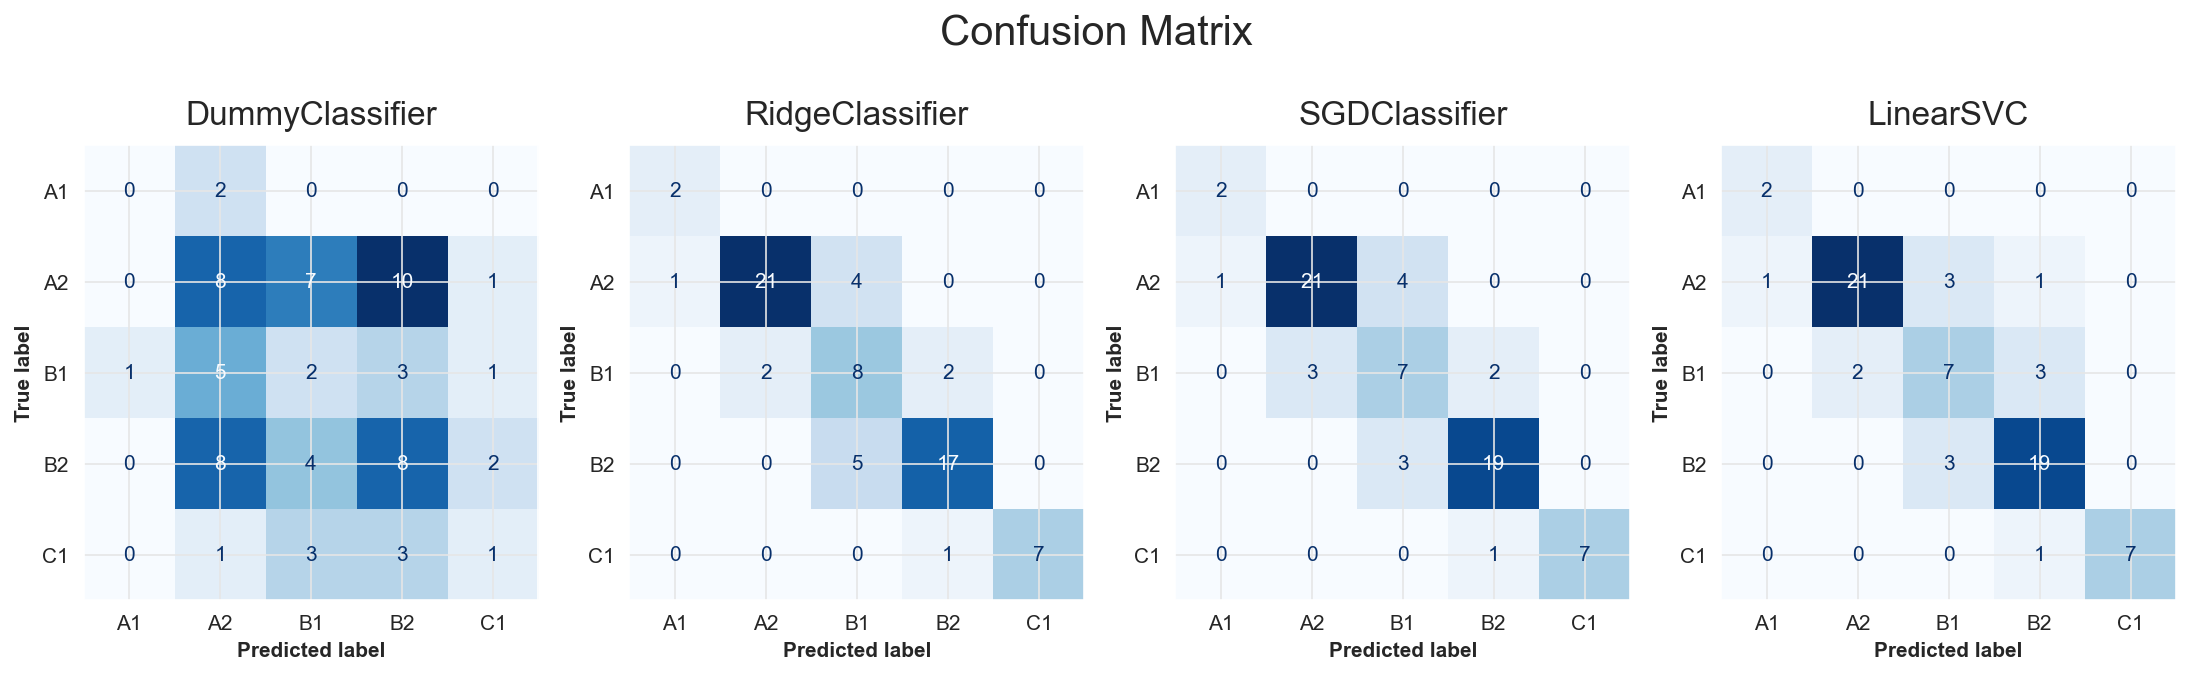

In [971]:

fig, ax = plt.subplots(figsize=(18,5), ncols=4, dpi=PLOT_DPI)
fig.suptitle('Confusion Matrix', fontsize=20)

for item in range(models.shape[0]):
    
    ConfusionMatrixDisplay.from_estimator(models.loc[item,'model'].fit(X_train, Y_train),
                                          X_valid, Y_valid,
                                          ax=ax[item], colorbar=False, cmap='Blues')
    ax[item].set_title(f"{models.loc[item,'name']}")


> Для более тонкого анализа полученных моделей можно воспользоваться Confusion Matrix.  
> Если модель ошибается, то предпочтительнее ошибка:  
>   - не более, чем на 1 класс;
>   - в сторону завышения класса.
>
> Однако из-за маленького размера тестового набора такой анализ чувствителен к ошибкам.

> Из положительного можно отметить, что модели редко ошибаются более чем на 1 класс.

### Выбор лучшей модели

In [972]:
SCORE_FIELD = 'integrale'  # название поля для выбора лучшей модели
LESS_IS_BETTER = False     # для направления сортировки

# название модели с лучшим score, полученным при кроссвалидации
best_model_name = models.sort_values(SCORE_FIELD, ascending=LESS_IS_BETTER).reset_index(drop=True).loc[0,'name']

# выбор модели из таблицы
model = models[models.name == best_model_name].model.values[0]

In [973]:
best_model_name

'RidgeClassifier'

### Save best model dump

In [974]:
model = model.fit(X,Y)

In [977]:
import pickle

# запись лучшей модели в файл

with open(f'results/dump {datetime.now().strftime("%Y-%m-%d_at_%H-%M")}, {SCORING}_{study.best_value:0.4f}, {model.steps[-1][0]}, CV={N_CV}.pcl',
          'wb') as model_dump:
    pickle.dump(model, model_dump)

In [976]:
# # запись лучшей модели в файл

# joblib.dump(model, f'results/dump {datetime.now().strftime("%Y-%m-%d_at_%H-%M")}, {SCORING}_{study.best_value:0.4f}, {model.steps[-1][0]}, CV={N_CV}.mdl')

---

## Вывод

### Краткий обзор проделанной работы

1. Выполнена обработка входных данных и создан датасет для обучения модели.
1. Создана baseline-модель.
1. Созданы и сравнены несколько моделей.
1. Исследовано влияние на качество модели ряда дополнительных признаков.
1. На базе лучшей модели создано [Streamlit-приложение](https://english-subtitles-level.streamlit.app/).

### Подготовка данных

На базе pdf-файлов "The Oxford by CEFR level" был создан словарь слов с указанием уровня CEFR.

Таблица с фильмами дополнена полем, содержащим слова из субтитров к фильму. Субтитры были взяты из отдельных файлы и очищены от лишней информации. Набор данных был расширен некоторым количеством дополнительных фильмов, для которых удалось найти оценки экспертов (вызывающих доверие).

Был создан ряд дополнительных признаков. Эксперименты с моделью не подтвердили полезность ни одного из них.

### Baseline

Для baseline-модели были сгенерированы тексты, состоящие из слов какого-либо определенного уровня.  
На этих текстах обучена baseline-модель. Эта модель не требует для обучения фильмы с оценками экспертов.  
Можно попробовать улучшить качество этой модели, расширив обучающий набор фразами определенного уровня.

### Моделирование

Ключевую роль в пайплайнах моделей играет TF-IDF-преобразование данных.  
На финальном этапе пайплайна используется линейный классификатор.

Для финальной оценки моделей разработана комплексная метрика, включающая время и качество предсказания модели. Для тонкой настройки эти параметры имеют свои веса.

Наибольшее значение в данной задаче имеет качество модели.  
Метрика `f1_weighted` для всех моделей составляет около **0.7**, что не намного лучше baseline-модели, для которой `f1_weighted` около **0.64**. Но существенно выше dummy-модели — ее `f1_weighted` около **0.3**.

### Факторы, влияющие на качество модели

1. Небольшое количество наблюдений в датасете:
    - расширение датасета затруднено отсутствием достоверной экспертной оценки.
1. Несбалансированность датасета:
    - некоторые классы представлены небольшим количеством фильмов, из-за чего страдает точность определения этого класса.
1. Большое количество сериалов с предположительно однотипными текстами в рамках сериала:
    - около 2/3 данных составляют сериалы;
    - однотипные тексты в рамках сериала ведут к переобучению модели;
    - фильмы уровня С1 представлены почти исключительно сериалами (да и тех немного);
    - разделение датасета на обучющую и тестовую выборки с учетом группировки по сериалам не улучшает качество модели, а показывает ее реальное низкое качество.
1. Практически одинаковое распределение слов разной сложности по "The Oxford by CEFR level" среди фильмов разного уровня:
    - только уровень A1 отличается соотношением количества слов разной сложности.
1. Расплывчатый уровень сложности, присвоенный фильму экспертами:
    - нередко эксперты оценивают фильм на разные уровни сложности, что не может не сказаться на качестве модели.

### Онлайн-приложение

На базе обученной модели создано [Streamlit-приложение](https://english-subtitles-level.streamlit.app/) .  
Чтобы получить прогноз достаточно перетащить файл с субтитрами в поле ввода.

### Перспективы

Исследовательский анализ данных показал, частота слов разного уровня практически не зависит от сложности фильма, определенной экспертами.  

Разметка данных, основанная на экспертной оценке сложности фильма является самым проблемным местом, потому что:  

a) расширение базы для обучения модели требует больших ресурсов (специалистов, времени, денег);  
b) единственная оценка для такого большого объекта, как фильм, может быть неинформативной: например, в фильме могут встречаться участки разной сложности;  
c) субъективность экспертной оценки: эксперты могут придавать разный вес различным аспектам.

Все это говорит против того, чтобы использовать экспертную оценку в качестве целевого признака.

Другой путь — использование расчетных характеристик текста для определения его сложности. Этот путь не подразумевает машинного обучения (по крайней мере, при простом подходе). В чистом виде, скорее всего, не позволит достичь требуемого качества прогноза.

И третий путь — совместить оба подхода: экспертную оценку и технический анализ текста.  
Но применить этот подход не ко всему тексту, а к **фразам,** из которых он состоит. Каждая фраза получит свою оценку сложности. На основе этих оценок будет выведена оценка для всего текста. Она необязательно должна быть простой (однозначно предсказать уровень): можно построить более сложную оценку, учитывающую различные особенности фильма: сложность слов, плотность речи, наличие сленга. Можно вводить весовые коэффициенты для создания динамической оценки фильма (под запросы конкретного пользователя). И даже **графики, показывающие изменение сложности на timeline.**

Сделать экспертизу фраз намного легче и точнее, чем всего текста:  
a) можно сделать перекрестную оценку фраз разными экспертами;  
b) можно сделать автоматизированную проверку уровня доверия к поставленным оценкам;  
c) cуществует множество фраз, уже имеющих оценку сложности;  
d) сложность фразы может учитывать не только словарный состав, но другие параметры (грамматика, длина);  
e) с помощью созданной модели можно добавлять новые фразы в обучающий набор.

Помимо оценки сложности можно оценить фразу по другим параметрам (наличие сленга, область применения), что позволит давать более точные рекомендации.

### Итого

1. Качество модели различается в зависимости от прогнозируемого уровня. Например, фильмы уровня A1 содержат большое количество слов, которые можно отнести к стоп-словам.  
Возможно, создание раздельных моделей бинарной классификации для каждого уровня и алгоритма, объединяющего результаты этих моделей, поможет улучшить качество прогноза.   
Опционально можно формировать результат как вероятность отнесения фильма к тому или иному уровню.

---

2. Совершенствование модели, созданной в данном проекте, в целом малоперспективно. Прежде всего из-за ограничений обучающего набора данных (дорогостоящее расширение, субъективность оценки, неоднородность сложности в рамках одного фильма и т. п.)  
Предпочтительнее попробовать создать модель на основе описанного выше анализа сложности фраз.  
Чем я и собираюсь заняться ))